### Термины лекции    
Гистограмма - способ представления табличных данных в виде столбчатой диаграммы.        
Количественные (вещественные) признаки - это признаки, представленные в числовом формате.           
Качественные (категориальные) признаки - это признаки, значения которых можно разделить на группы или категории.             
Визуальный анализ данных (exploratory data analysis, EDA) - это эффективный способ интерпретации данных и представления результатов анализа в виде графиков и диаграмм.               
Корреляционная матрица (матрица корреляций) – это квадратная таблица, заголовками строк и столбцов которой являются признаки, а на пересечении строк и столбцов выводятся коэффициенты корреляции для соответствующей пары признаков.              
Коэффициент корреляции – это статистическая мера, которая вычисляет силу связи между двумя переменными. Значения коэффициента корреляции находятся в диапазоне от -1 до 1.            


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1.	Устройство графиков

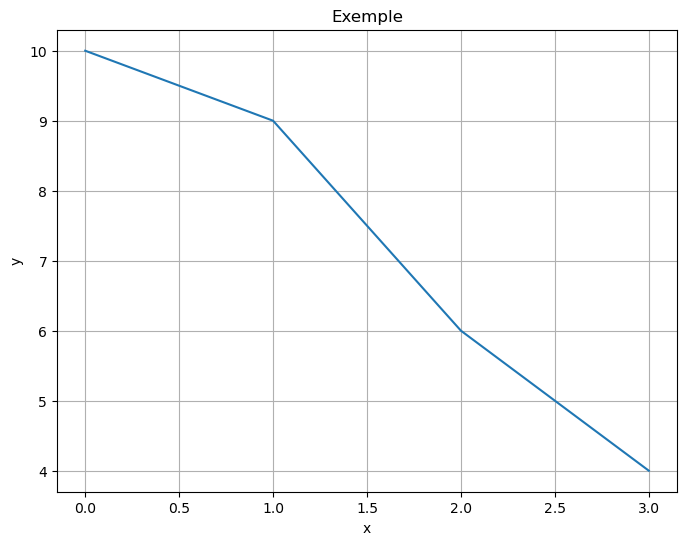

In [8]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 4])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exemple')
plt.grid()

### 2.	Виды графиков

a.	Линейный график

In [17]:
df = pd.read_csv('bank_10.csv', sep=';')
df
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values( by = 'month')
data.head()

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766


In [113]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0


Text(0, 0.5, 'Количество клиентов')

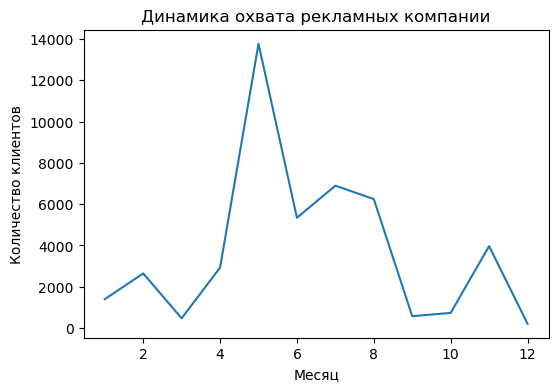

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных компании')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')

Text(0, 0.5, 'Количество клиентов')

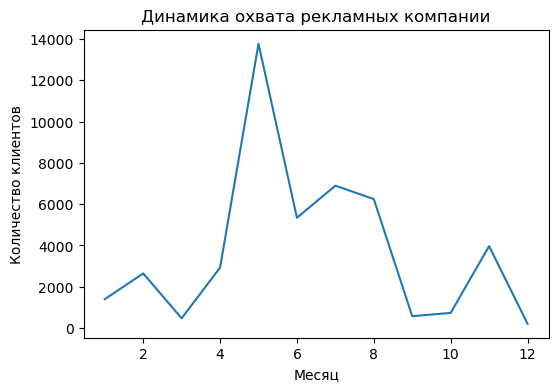

In [20]:
plt.figure(figsize=(6, 4))
sns.lineplot(x = data['month'], y = data['count'])

plt.title('Динамика охвата рекламных компании')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')

### b.	Гистограмма

### 1.	Matplotlib 

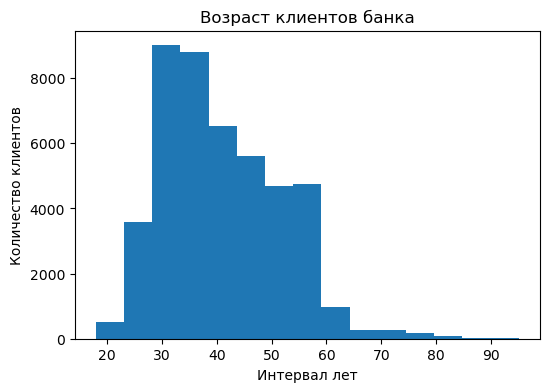

In [27]:
plt.figure(figsize = (6, 4))
plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал лет')
plt.ylabel('Количество клиентов');

### 2.	Seaborn

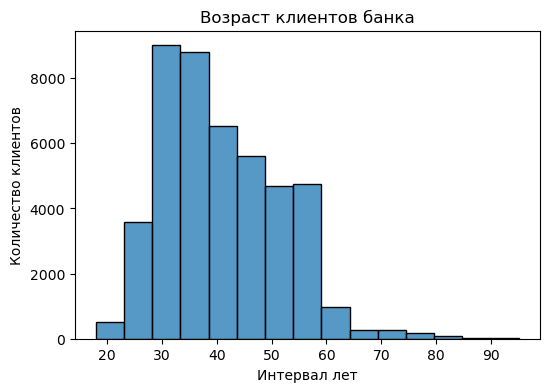

In [28]:
plt.figure(figsize = (6, 4))
sns.histplot(df['age'], bins =15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал лет')
plt.ylabel('Количество клиентов');

### c.	Диаграмма рассеяния
#### точечный график

In [29]:
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


Text(0, 0.5, 'Покупки')

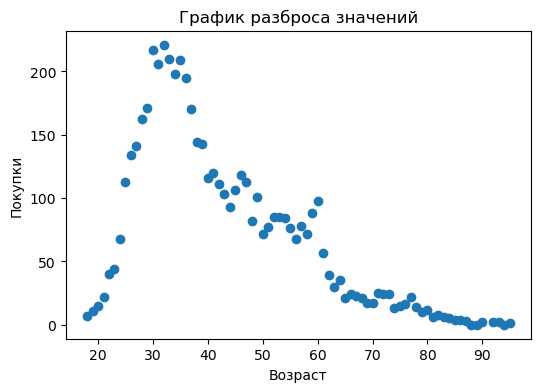

In [30]:
plt.figure(figsize = (6, 4))
plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст') 
plt.ylabel('Покупки')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


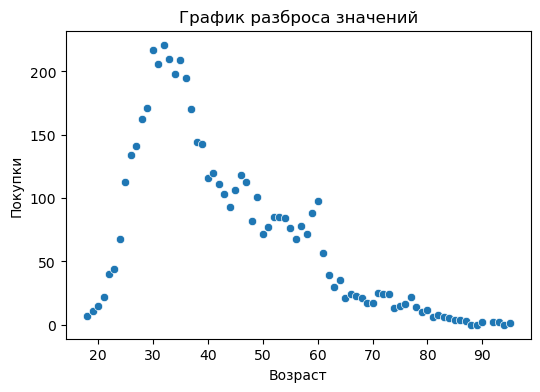

In [31]:
plt.figure(figsize = (6, 4))
sns.scatterplot(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст') 
plt.ylabel('Покупки');

### d.	Столбчатые диаграммы

#### 1.	Matplotlib 

In [36]:
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


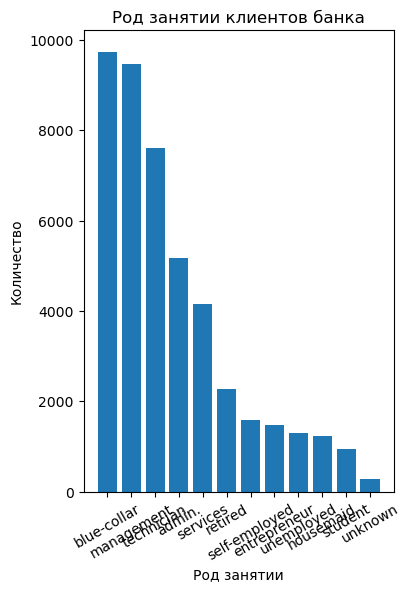

In [47]:
plt.figure(figsize=(4, 6))

plt.bar(data['index'], data['job'])

plt.title('Род занятии клиентов банка')
plt.xlabel('Род занятии')
plt.ylabel('Количество')
plt.xticks(rotation=30);

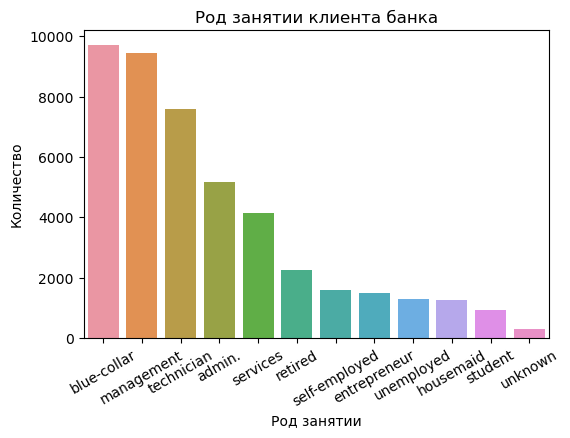

In [49]:
plt.figure(figsize=(6, 4))

sns.barplot(x= data['index'],y =  data['job'])

plt.title('Род занятии клиента банка')
plt.xlabel('Род занятии')
plt.ylabel('Количество')
plt.xticks(rotation=30);

### i.	Многорядовые

In [55]:
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


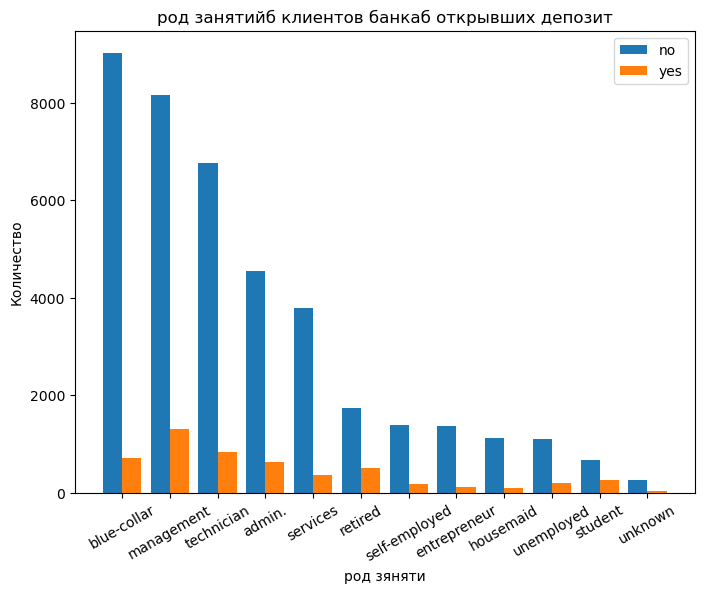

### ii.	Сложенная столбчатая диаграмма

In [74]:
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns = {0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


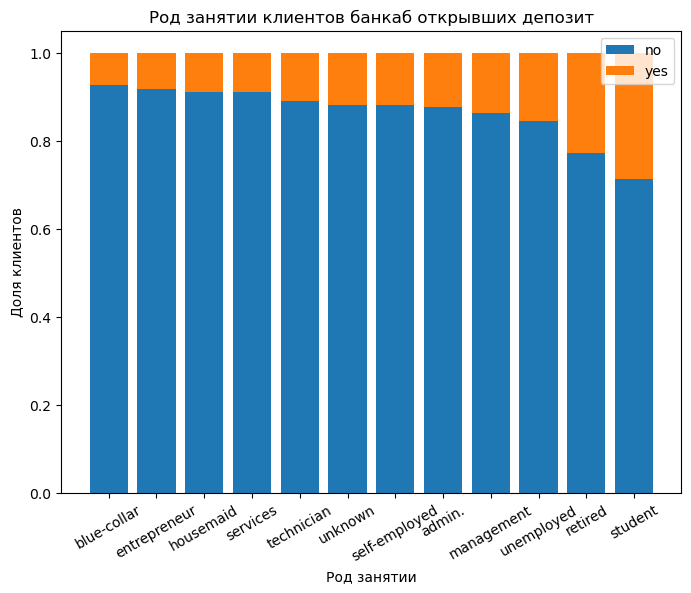

In [84]:
plt.figure(figsize=(8,6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятии клиентов банкаб открывших депозит')
plt.xlabel('Род занятии')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation= 30);

### e.	Ящик с усами

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

<AxesSubplot:>

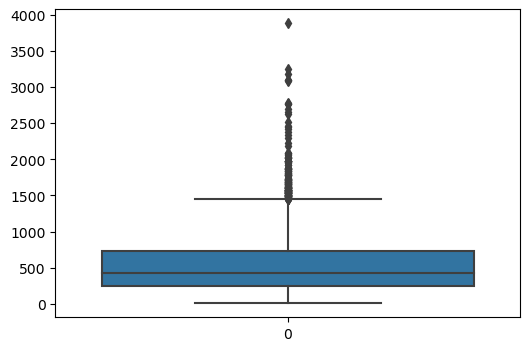

In [88]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = [data1])

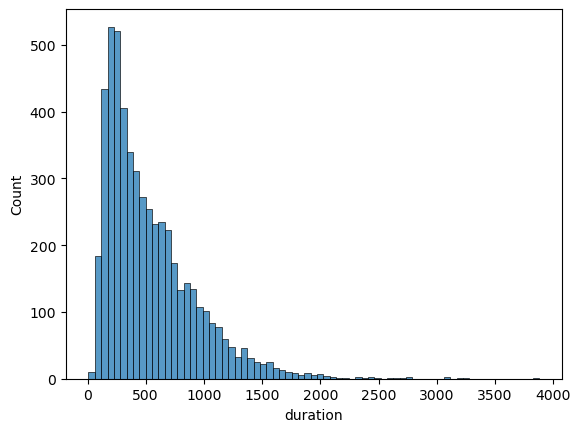

In [91]:
sns.histplot(x = data1);

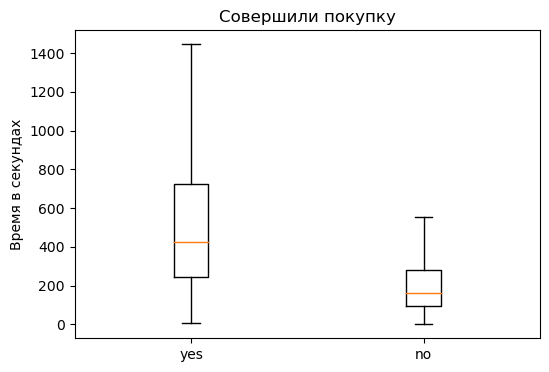

In [101]:
plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.title('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1,2],['yes', 'no']);

Строим боксплот без выбросов

In [106]:
plt.figure(figsize=(6, 4))

sns.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0,1], ['yes', 'no']);

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:734: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 600x400 with 0 Axes>

### f.	Круговая диаграмма

ValueError: could not convert string to float: 'blue-collar'

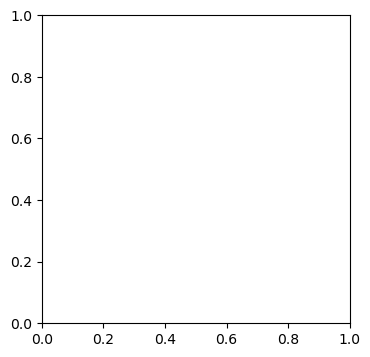

In [112]:
plt.figure(figsize = (6,4))

plt.pie(data, autopct='%1. 1f%%')

plt.title('Доля клиентов банка б открывших депозит')
plt.legende(data.index)

### 3.	Визуальный анализ данных


### a.	Анализ вещественных признаков

b.	Анализ категориальных признаков

c.	Анализ взаимного распределения признаков

i.	Вещественные признаки

ii.	Категориальные признаки

iii.	Матрица корреляций

4.	Инструменты для визуализации геоданных


a.	Matplotlib


b.	Folium


c.	KeplerGL